# Linear regression via gradient descent: function edition

We want to find the vector $\theta$ that minimizes the loss/cost function $J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$, where $h_\theta(x^{(i)}) = \theta^T X_i$.

Gradient descent begins with $\theta_{\text{init}}$, some initial value(s) for elements $j=0, ..., n$, then updates $\theta$ iteratively such that $\theta_j := \theta_j - \alpha \dfrac{\partial J(\theta)}{\partial \theta_j}$, where $\alpha$ is a learning rate or step size parameter. In this way, we are taking first order steps along the gradient towards the direction with lower $J(\theta)$.

The partial derivative of the cost function with respect to parameter $\theta_j$ is $\dfrac{\partial J(\theta)}{\partial \theta_j} = \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$, which means that the update rule can be written as $\theta_j := \theta_j - \alpha \sum_{i=1}^{m} \big(h_\theta (x^{(i)}) - y^{(i)}\big) x_j^{(i)}$.

In this implementation I'll try to avoid global variables and use functions instead.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def h(X, theta):
    """Compute hypothesis function X * theta
    
    Args: 
        X: Design matrix
        theta: parameter vector
        
    Returns: 
        prediction: the product of X and theta
    """
    prediction = X.dot(theta)
    return prediction

def sim_reg(N, p, sigma):
    """Simulate linear regression data
    
    Args: 
        N: (int) the number of examples
        p: (int) the number of parameters
        sigma: (float) residual standard deviation
    
    Returns: 
        A dict containing the true coefficients, y, and X
    """
    # construct the design matrix
    intercept = np.repeat(1, N)
    if p > 1:
        x = np.random.rand(N, p - 1)
        X = np.column_stack((intercept, x))
    else:
        X = intercept
    
    theta = np.random.normal(0, 1, p)
    mu_y = h(X, theta)
    y = np.random.normal(mu_y, sigma, N)
    return {'theta':theta, 'y':y, 'X':X}

In [2]:
## Define parameters as global variables
N = 10000  # sample size
p = 4     # number of coefficients
sigma = 1 # standard deviation of errors

out = sim_reg(N, p, sigma)

print(out['theta'])

[-0.80694746 -0.11000682 -0.61868594  1.00225658]


Defining more helper functions to implement gradient descent: 

In [3]:
def partial_J(y, X, theta, j):
    """Computes partial derivative of J wrt theta
    
    Args: 
        y: response vector
        X: design matrix
        theta: coefficient vector
        j: index for the coefficient 
        
    Returns: 
        dJ/dtheta_j (float)
    """
    return sum((h(X, theta) - y) * X[:, j])

def gradient_descent(theta, alpha, iters, y, X):
    """Implements gradient descent
    
    Args: 
        theta: (array-like) coefficient vector
        alpha: (float) learning rate
        iters: (int) number of iterations (steps to take)
    
    Returns: 
        theta_out: (numpy array) value of theta at each iteration
    """
    n = len(theta)
    theta_out = np.empty([iters, n])
    for i in range(iters):
        theta_out[i, :] = theta
        for j in range(n):
            theta[j] = theta[j] - alpha * partial_J(y, X, theta, j)
    return theta_out

Now, we can initialize the parameters at some random, dispersed values, choose the learning rate, and iteratively update our parameter vector using gradient descent.

In [4]:
theta_init = np.random.normal(size = p)
theta_init

alpha = .0001
iters = 100

res = gradient_descent(theta_init, alpha = alpha, iters = iters, 
                       y = out['y'], X = out['X'])

Last, plot the results to evaluate convergence and parameter recovery.

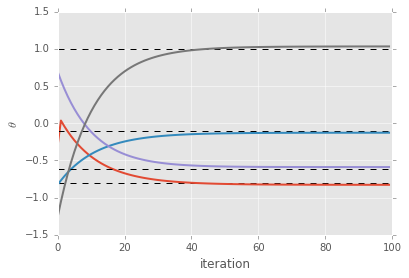

In [5]:
for i in range(0, out['X'].shape[1]):
    plt.axhline(out['theta'][i], linestyle = 'dashed', color = 'black')
    plt.plot(range(iters), res[:, i], lw = 2)
    plt.xlabel('iteration')
    plt.ylabel(r'$\theta$')